In [4]:
import matplotlib.pyplot as plt
import os 
import sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '../selfscat/'))
from mean_xsectv_majorana import * 
from xsect_sch import *

In [5]:
GeVinvTocm = 0.197e-13
GeVtogram = 1.78e-24
c = 3e5 #km/s

# $s$-channel resonance

In [6]:
mX = 10
mphi = 20.0000001
alphaX = 1e-0
sign = 1

In [9]:
vs = np.logspace(0,np.log10(10000),100)/c #mean velocity, not v0
xsects = list(map(lambda v: v*xsect_sch(mX, mphi, alphaX, v, 0.0), vs))

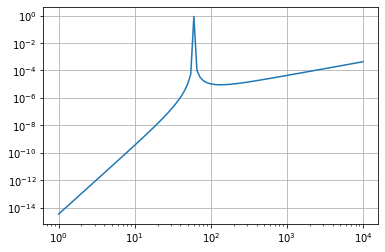

In [10]:
plt.plot(vs*c, np.array(xsects)*GeVinvTocm**2/(mX*GeVtogram)*c)
plt.loglog()

plt.grid(True)

### Benchmark point of http://arxiv.org/abs/1810.04709

In [11]:
mtilde = 0.4 #GeV
vR = 108 / c 
gamma = 1e-3
sigma0_over_m = 0.1 #cm^2/g

In [12]:
mX = mtilde * (0.25)**(1.0/3)
mphi = np.sqrt(vR**2 + 4) * mX
alphaX = 8*mphi**2*gamma/mX**2 
sigma0 = sigma0_over_m /GeVinvTocm**2 *(mX*GeVtogram)
print(mX, mphi, alphaX, mphi - mX*2)

0.25198420997897464 0.5039684281222375 0.03200000103679999 8.164288245460227e-09


In [13]:
vs = np.logspace(1,np.log10(10000),100)/c #mean velocity, not v0
xsects = list(map(lambda v: v*(sigma0 + xsect_sch(mX, mphi, alphaX, v, 0.0)), vs))

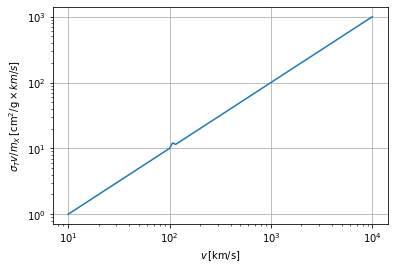

In [14]:
plt.plot(vs*c, np.array(xsects)*GeVinvTocm**2/(mX*GeVtogram)*c)
plt.loglog()

plt.xlabel(r"$v\,[\mathrm{km/s}]$")
plt.ylabel(r"$\sigma_T v/m_X\,[\mathrm{cm^2/g}\times km/s]$ ")

plt.grid(True)

# Interference between $s$ and $t$, $u$-channel

### Born region

In [15]:
vs = np.logspace(0,3.5,10)/c

b = 0.01
a = 0.01
mX = 1
alphaX = vs[0]/2/a
mphi = alphaX*mX/b
sign = 1
print(mX, mphi, alphaX, vs[-1]/2/alphaX, alphaX*mX/mphi)

1 0.016666666666666666 0.00016666666666666666 31.622776601683796 0.01


In [16]:
xsects_intf = list(map(lambda v: v*xsect_intf_part_wave(mX, mphi, alphaX, v, sign, 0.0)[0], vs))

/Users/yanagi/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/integrate/_ivp/common.py:41: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


In [17]:
xsects_intf_born = list(map(lambda v: v*xsect_intf_born(mX, mphi, alphaX, v, 0.0), vs))

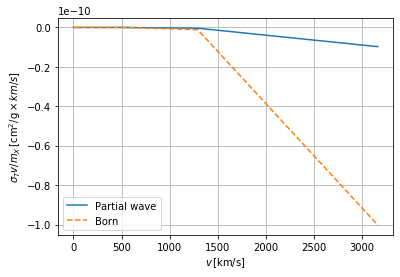

In [18]:
plt.plot(vs*c, np.array(xsects_intf)*GeVinvTocm**2/(mX*GeVtogram)*c, label="Partial wave")
plt.plot(vs*c, np.array(xsects_intf_born)*GeVinvTocm**2/(mX*GeVtogram)*c, "--", label="Born")
plt.legend()

plt.xlabel(r"$v\,[\mathrm{km/s}]$")
plt.ylabel(r"$\sigma_T v/m_X\,[\mathrm{cm^2/g}\times km/s]$ ")
#plt.xlim((0,3000))
plt.grid(True)

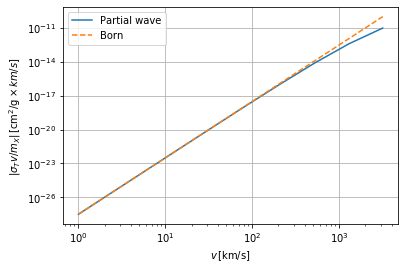

In [19]:
plt.plot(vs*c, np.abs(np.array(xsects_intf)*GeVinvTocm**2/(mX*GeVtogram)*c), label="Partial wave")
plt.plot(vs*c, np.abs(np.array(xsects_intf_born)*GeVinvTocm**2/(mX*GeVtogram)*c), "--", label="Born")
plt.legend()

plt.loglog()
plt.xlabel(r"$v\,[\mathrm{km/s}]$")
plt.ylabel(r"$|\sigma_T v/m_X|\,[\mathrm{cm^2/g}\times km/s]$ ")

plt.grid(True)

# Velocity averaged cross section

### Benchmark point of http://arxiv.org/abs/1810.04709

In [20]:
mtilde = 0.4 #GeV
vR = 108 / c 
gamma = 1e-3
sigma0_over_m = 0.1 #cm^2/g

mX = mtilde * (0.25)**(1.0/3)
mphi = np.sqrt(vR**2 + 4) * mX
alphaX = 8*mphi**2*gamma/mX**2 
sigma0 = sigma0_over_m /GeVinvTocm**2 *(mX*GeVtogram)
print(mX, mphi, alphaX, mphi - mX*2)

0.25198420997897464 0.5039684281222375 0.03200000103679999 8.164288245460227e-09


In [21]:
vs = np.logspace(1,4,100)/c #mean velocity, not v0
xsects = list(map(lambda v: mean_xsectv_sch(mX, mphi, alphaX, v, width_sm=0), vs))

In [22]:
xsects_intf = list(map(lambda v: mean_xsectv_intf(mX, mphi, alphaX, v, sign=1.0, width_sm=0, max_L=10000, max_itr=10000, tol_peak=1e-8, n_width=1000, eval_N_peak=1000), vs))

In [23]:
xsects_analyt = list(map(lambda v:(np.pi/2)**(3/2)*alphaX/mX**3*(vR/np.sqrt(np.pi/8)/v)**3*np.exp(-(vR/np.sqrt(np.pi/8)/v)**2/2), vs))

In [24]:
xsects_t = list(map(lambda v:mean_xsectv(mX, mphi, alphaX, v, sign=1.0, minn=10, maxn=10, max_L=1000, max_itr=1000), vs))

In [25]:
sigmav0 = vs*sigma0

In [26]:
data = np.genfromtxt("../sample_data/fitted_xsect_log.dat", comments="#", delimiter=" ", names=("v", "sigma", "xerr", "yerr"))

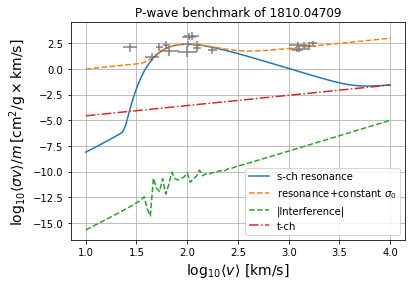

In [27]:
plt.plot(np.log10(vs*c), np.log10(np.array(xsects)*GeVinvTocm**2/(mX*GeVtogram)*c), "-", label="s-ch resonance")
plt.plot(np.log10(vs*c), np.log10((np.array(xsects)+sigmav0)*GeVinvTocm**2/(mX*GeVtogram)*c), "--", label="resonance+constant $\sigma_0$")
plt.plot(np.log10(vs*c), np.log10((np.abs(np.array(xsects_intf))*GeVinvTocm**2/(mX*GeVtogram)*c)), "--", label="|Interference|")
plt.plot(np.log10(vs*c), np.log10(np.array(xsects_t)*GeVinvTocm**2/(mX*GeVtogram)*c), "-.", label="t-ch")
#plt.plot(np.log10(vs*c), np.log10(np.array(xsects_analyt)*GeVinvTocm**2/(GeVtogram)*c), "--")

plt.errorbar(data["v"], data["sigma"], xerr=data["xerr"], yerr=data["yerr"], 
             fmt="o", color="gray", markersize=1)


plt.title("P-wave benchmark of 1810.04709")
plt.legend(loc="lower right")
plt.grid(True)
plt.xlabel(r"$\log_{10} \langle v \rangle$ [km/s]", fontsize=14)
plt.ylabel(r"$\log_{10} \langle \sigma v \rangle/m\,[\mathrm{cm^2/g\times km/s}]$", fontsize=14)
#plt.ylim([0, 3.3])

plt.grid(True)

#plt.savefig("../plot/s-ch_res.pdf")

### Let's see more of the interference term

In [28]:
mXs = [0.1, 10, 30, 30]
mphis = [1e-4, 1e-2, 0.03, 0.1]
alphas = [7e-6, 1e-3, 2e-3, 2e-3]
sign = 1.0

In [29]:
xsect_t_arr =[]
xsect_s_arr = []
xsect_intf_arr = []
vs = np.logspace(1, 3.5,20)/c #mean velocity, not v0
for (mX, mphi, alphaX) in zip(mXs, mphis, alphas):
    print(mX)
    print("  t-ch")
    xsects = list(map(lambda v:mean_xsectv(mX, mphi, alphaX, v, sign, minn=10, maxn=10, max_L=1000, max_itr=100), vs))
    xsect_t_arr.append(xsects)
    print("  s-ch")
    xsects = list(map(lambda v: mean_xsectv_sch(mX, mphi, alphaX, v, width_sm=0), vs))
    xsect_s_arr.append(xsects)
    print("  interfernce")
    xsects = list(map(lambda v: mean_xsectv_intf(mX, mphi, alphaX, v, sign, width_sm=0, max_L=100), vs))
    xsect_intf_arr.append(xsects)

0.1
  t-ch
  s-ch
  interfernce
10
  t-ch
  s-ch
  interfernce
30
  t-ch
  s-ch
  interfernce
30
  t-ch
  s-ch
  interfernce


Text(0, 0.5, '$\\log_{10} \\langle \\sigma v \\rangle/m$')

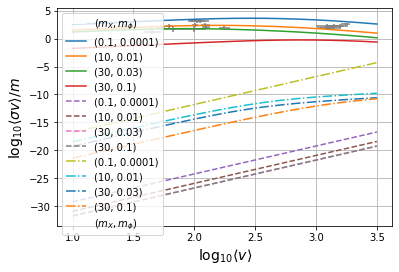

In [30]:
data = np.genfromtxt("../sample_data/fitted_xsect_log.dat", comments="#", delimiter=" ", names=("v", "sigma", "xerr", "yerr"))

plt.errorbar(data["v"], data["sigma"], xerr=data["xerr"], yerr=data["yerr"], fmt="o", color="gray",
             markersize=1)

plt.plot([],[], label=r"$(m_X, m_\phi)$", color="white")
for mX, mphi, xsects in zip(mXs, mphis, xsect_t_arr):
    plt.plot(np.log10(vs*c), np.log10(np.array(xsects)*GeVinvTocm**2/(mX*GeVtogram)*c),
            label="({}, {})".format(mX, mphi))
    
for mX, mphi, xsects in zip(mXs, mphis, xsect_s_arr):
    plt.plot(np.log10(vs*c), np.log10(np.array(xsects)*GeVinvTocm**2/(mX*GeVtogram)*c), "--",
            label="({}, {})".format(mX, mphi))
    
for mX, mphi, xsects in zip(mXs, mphis, xsect_intf_arr):
    plt.plot(np.log10(vs*c), np.log10(np.array(np.abs(xsects))*GeVinvTocm**2/(mX*GeVtogram)*c), "-.",
            label="({}, {})".format(mX, mphi))

plt.plot([],[], label=r"$(m_X, m_\phi)$", color="white")
plt.legend()
plt.grid(True)
plt.xlabel(r"$\log_{10} \langle v \rangle$", fontsize=14)
plt.ylabel(r"$\log_{10} \langle \sigma v \rangle/m$", fontsize=14)